<a href="https://colab.research.google.com/github/Abhijith-S-D/Spotify-EDA/blob/main/Spotify_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Exploratory Data Analysis (EDA) on the Spotify Dataset 🎹

**Python for Data Science Mini Project**

By,
* **Abhijith S D**
* **Arvind C R**
* **Ayyasamy S**
* **Gurumurthy Kalyanpur Viswanathaiah**
* **Manjunath**

## ✨ Introduction ✨
Welcome to the Exploratory Data Analysis (EDA) of the Spotify dataset! In this notebook, we will explore various aspects of the dataset to uncover insights and understand the underlying patterns.

## 📚 Libraries Used 🔧

### 🐍 Pandas
* **Purpose**: Data manipulation and analysis.
* **Usage**: To handle and process data, including reading and cleaning the dataset.

### 📊 Seaborn
* **Purpose**: Statistical data visualization.
* **Usage**: To create informative and attractive visualizations such as histograms, pair plots, and violin plots.

### 🖼️ Matplotlib
* **Purpose**: Plotting and visualization.
* **Usage**: For creating static, animated, and interactive visualizations, including histograms and plots with customized styles.

### 📈 Plotly Express
* **Purpose**: Interactive data visualization.
* **Usage**: To create interactive plots and visualizations that allow for deeper exploration of the data.

### ⚠️ Warnings
* **Purpose**: Manage warnings.
* **Usage**: To suppress warnings that may clutter the output.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mp
import plotly.express as px
import warnings as w
w.filterwarnings('ignore')

# 📋 Selected Dataset Overview and Preprocessing 🔍

## 📈 Data Setup linking kaggle and google colab


### 📰 Read the kaggle API token to interact with your kaggle account

### ⚙️ Series of commands to set-up for download

### ♿ giving rw access (if 401-nathorized)

### ✅ Sanity check if able to access kaggle

### ⬇️ Download data command

### 🤐 Unzip Dataset

In [14]:
from google.colab import files
files.upload()
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle datasets download -d nelgiriyewithana/most-streamed-spotify-songs-2024
! unzip most-streamed-spotify-songs-2024.zip

Saving kaggle.json to kaggle (2).json
-rw-r--r-- 1 root root 69 Aug 16 08:53 kaggle.json
/content
ref                                                            title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  ----  -------------------  -------------  ---------  ---------------  
muhammadehsan000/healthcare-dataset-2019-2024                  Healthcare Dataset (2019-2024)                      3MB  2024-08-09 17:52:25           2552         60  1.0              
muhammadehsan000/global-electric-vehicle-sales-data-2010-2024  Global Electric Vehicle Sales Data (2010-2024)     83KB  2024-08-09 16:39:22           1969         37  1.0              
emreksz/software-engineer-jobs-and-salaries-2024               Software Engineer Jobs & Salaries 2024             23KB  2024-08-12 00:08:03            900        

## 🗂️ Loading the Dataset 📥

We began by loading the [Most Streamed Spotify Songs 2024](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024) dataset using `pandas`. This dataset contains information about various tracks, including metrics from different streaming platforms.

In [15]:
df = pd.read_csv('Most Streamed Spotify Songs 2024.csv', encoding='latin1')

## 🏷️ Initial Data Examination 👀
We reviewed the last few rows of the dataset to understand its structure and content. The dataset consists of 29 columns and 4599 rows with diverse types of information such as track names, artists, release dates, and various streaming metrics.

In [16]:
pd.reset_option('display.max_columns')
df.tail(3)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0
4599,Me Acostumbre (feat. Bad Bunny),Me Acostumbre (feat. Bad Bunny),Arcï¿½ï¿½,4/11/2017,USB271700107,"4,593",19.4,"255,740,653","32,138","14,066,526",...,NaN,4.0,"127,479",4.0,"69,006,739","11,320",NaN,"767,006",NaN,1


In [17]:
df.shape

(4600, 29)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   float64
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4600 non-null   float64
 8   Spotify Playlist Count      4600 non-null   float64
 9   Spotify Playlist Reach      4600 non-null   float64
 10  Spotify Popularity          4600 non-null   float64
 11  YouTube Views               4600 non-null   float64
 12  YouTube Likes               4600 non-null   float64
 13  TikTok Posts                4600 

In [24]:
summary_statistics = df.describe()
print("Summary Statistics:")
summary_statistics

Summary Statistics:


,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
count,4600.000000,4600.000000,4.600000e+03,4600.000000,4.600000e+03,4600.000000,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,...,4600.000000,4600.000000,4.600000e+03,4600.000000,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,0.0,4600.000000
mean,2290.678043,41.844043,4.363971e+08,58487.056304,2.298139e+07,52.402609,3.758269e+08,2.729404e+06,7.035092e+05,8.864079e+07,...,138.574348,25.841739,1.033699e+06,19.535217,6.506994e+07,6.365349e+04,4.089647e+06,2.211905e+06,NaN,0.358913
std,1322.878312,38.543766,5.362792e+08,70961.508769,2.959612e+07,28.247818,6.854251e+08,4.494884e+06,2.147581e+06,4.899035e+08,...,426.777427,50.229711,3.218861e+06,25.181672,1.508180e+08,2.254466e+05,1.811728e+07,5.709079e+06,NaN,0.479734
min,1.000000,19.400000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000
25%,1144.750000,23.300000,6.340627e+07,6021.250000,4.500124e+06,45.000000,2.821574e+07,2.887055e+05,0.000000e+00,7.315525e+04,...,0.000000,1.000000,2.960250e+03,1.000000,6.282500e+02,0.000000e+00,0.000000e+00,1.058878e+05,NaN,0.000000
50%,2290.500000,29.900000,2.263761e+08,31211.000000,1.287765e+07,65.000000,1.283531e+08,1.072084e+06,6.495250e+04,1.270331e+07,...,4.000000,9.000000,1.223295e+05,11.000000,2.906567e+06,2.044500e+03,0.000000e+00,6.109605e+05,NaN,0.000000
75%,3436.250000,44.425000,6.113563e+08,84908.250000,2.930526e+07,71.000000,4.204637e+08,3.354867e+06,4.599832e+05,6.721851e+07,...,103.000000,30.000000,6.076998e+05,28.000000,4.669138e+07,2.363875e+04,1.237098e+05,2.242540e+06,NaN,1.000000
max,4998.000000,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,...,7098.000000,632.000000,4.819785e+07,210.000000,1.463624e+09,3.780513e+06,3.198359e+08,2.197945e+08,NaN,1.000000


## 📜 Column Names 📑
The dataset includes columns like:
* 🎵 **Track**
* 📀 **Album Name**
* 🎤 **Artist**
* 📅 **Release Date**
* 🔢 **ISRC**
* 📈 **All Time Rank**
* ⭐ **Track Score**
* 🎧 **Spotify Streams**
* 📋 **Spotify Playlist Count**
* 🌐 **Spotify Playlist Reach**
* 🎼 **Spotify Popularity**
* 📹 **YouTube Views**
* 👍 **YouTube Likes**
* 🎥 **TikTok Posts**
* 💖 **TikTok Likes**
* 👁️ **TikTok Views**
* 🎵 **YouTube Playlist Reach**
* 🍏 **Apple Music Playlist Count**
* 📻 **AirPlay Spins**
* 📡 **SiriusXM Spins**
* 🎶 **Deezer Playlist Count**
* 🌍 **Deezer Playlist Reach**
* 📚 **Amazon Playlist Count**
* 🎙️ **Pandora Streams**
* 📻 **Pandora Track Stations**
* 🔊 **Soundcloud Streams**
* 🕵️ **Shazam Counts**
* 🎶 **TIDAL Popularity**
* 🔞 **Explicit Track**

In [25]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

## 📉 Missing Values Analysis ⚠️
We identified columns with missing values:
* 🎤 **Artist**: 5 missing values
* 🎧 **Spotify Streams**: 113 missing values
* 📋 **Spotify Playlist Count**: 70 missing values
* 🌐 **Spotify Playlist Reach**: 72 missing values
* 🎼 **Spotify Popularity**: 804 missing values
* 📹 **YouTube Views**: 308 missing values
* 👍 **YouTube Likes**: 315 missing values
* 🎥 **TikTok Posts**: 1173 missing values
* 💖 **TikTok Likes**: 980 missing values
* 👁️ **TikTok Views**: 981 missing values
* 🎵 **YouTube Playlist Reach**: 1009 missing values
* 🍏 **Apple Music Playlist Count**: 561 missing values
* 📻 **AirPlay Spins**: 498 missing values
* 📡 **SiriusXM Spins**: 2123 missing values
* 🎶 **Deezer Playlist Count**: 921 missing values
* 🌍 **Deezer Playlist Reach**: 928 missing values
* 📚 **Amazon Playlist Count**: 1055 missing values
* 🎙️ **Pandora Streams**: 1106 missing values
* 📻 **Pandora Track Stations**: 1268 missing values
* 🔊 **Soundcloud Streams**: 3333 missing values
* 🕵️ **Shazam Counts**: 577 missing values
* 🎶 **TIDAL Popularity**: 4600 missing values

In [ ]:
df.isna().sum()

,0
Track,0
Album Name,0
Artist,5
Release Date,0
ISRC,0
All Time Rank,0
Track Score,0
Spotify Streams,113
Spotify Playlist Count,70
Spotify Playlist Reach,72


## 🔄 Removing Duplicates 🔥
We checked for duplicate entries in the dataset:
* 🚨 **Duplicates Found**: 2
* 🗑️ **Duplicates Removed**: The dataset now contains 4598 rows.

In [ ]:
df.duplicated().sum()

2

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

## 🔄 Cleaning data and filling NA values 🔥
We checked for NaN entries in the dataset:
* 🚨 replaced NaN with 0

In [ ]:
columns_to_clean = ['All Time Rank',
                    'Track Score',
                    'Spotify Streams',
                    'Spotify Playlist Count',
                    'Spotify Playlist Reach',
                    'Spotify Popularity',
                     'YouTube Views',
                     'YouTube Likes',
                     'TikTok Posts',
                     'TikTok Likes',
                     'TikTok Views',
                     'YouTube Playlist Reach',
                     'Apple Music Playlist Count',
                     'AirPlay Spins',
                     'SiriusXM Spins',
                     'Deezer Playlist Count',
                     'Deezer Playlist Reach',
                     'Amazon Playlist Count',
                    'Pandora Streams',
                    'Pandora Track Stations',
                    'Soundcloud Streams',
                    'Shazam Counts',
                    'Explicit Track']

def clean_and_convert_fill_zero(column):
    df[column] = df[column].replace('[\$,]', '', regex=True).astype(float)
    df[column] = df[column].fillna(0)

for column in columns_to_clean:
    clean_and_convert_fill_zero(column)

## 📊 Descriptive Statistics 📈
We computed descriptive statistics for the following columns:
* ⭐ **Track Score**: Mean of 41.85, Standard Deviation of 38.55
* 🎼 **Spotify Popularity**: Mean of 63.50, Standard Deviation of 16.19
* 🍏 **Apple Music Playlist Count**: Mean of 54.61, Standard Deviation of 71.63
* 🎶 **Deezer Playlist Count**: Mean of 32.32, Standard Deviation of 54.29
* 📚 **Amazon Playlist Count**: Mean of 25.35, Standard Deviation of 25.99
* 🎶 **TIDAL Popularity**: This column was dropped due to all missing values.
* 🔞 **Explicit Track**: 0 or 1 indicating the explicit nature of the track.

In [26]:
df.describe()

,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
count,4600.000000,4600.000000,4.600000e+03,4600.000000,4.600000e+03,4600.000000,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,...,4600.000000,4600.000000,4.600000e+03,4600.000000,4.600000e+03,4.600000e+03,4.600000e+03,4.600000e+03,0.0,4600.000000
mean,2290.678043,41.844043,4.363971e+08,58487.056304,2.298139e+07,52.402609,3.758269e+08,2.729404e+06,7.035092e+05,8.864079e+07,...,138.574348,25.841739,1.033699e+06,19.535217,6.506994e+07,6.365349e+04,4.089647e+06,2.211905e+06,NaN,0.358913
std,1322.878312,38.543766,5.362792e+08,70961.508769,2.959612e+07,28.247818,6.854251e+08,4.494884e+06,2.147581e+06,4.899035e+08,...,426.777427,50.229711,3.218861e+06,25.181672,1.508180e+08,2.254466e+05,1.811728e+07,5.709079e+06,NaN,0.479734
min,1.000000,19.400000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000
25%,1144.750000,23.300000,6.340627e+07,6021.250000,4.500124e+06,45.000000,2.821574e+07,2.887055e+05,0.000000e+00,7.315525e+04,...,0.000000,1.000000,2.960250e+03,1.000000,6.282500e+02,0.000000e+00,0.000000e+00,1.058878e+05,NaN,0.000000
50%,2290.500000,29.900000,2.263761e+08,31211.000000,1.287765e+07,65.000000,1.283531e+08,1.072084e+06,6.495250e+04,1.270331e+07,...,4.000000,9.000000,1.223295e+05,11.000000,2.906567e+06,2.044500e+03,0.000000e+00,6.109605e+05,NaN,0.000000
75%,3436.250000,44.425000,6.113563e+08,84908.250000,2.930526e+07,71.000000,4.204637e+08,3.354867e+06,4.599832e+05,6.721851e+07,...,103.000000,30.000000,6.076998e+05,28.000000,4.669138e+07,2.363875e+04,1.237098e+05,2.242540e+06,NaN,1.000000
max,4998.000000,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,...,7098.000000,632.000000,4.819785e+07,210.000000,1.463624e+09,3.780513e+06,3.198359e+08,2.197945e+08,NaN,1.000000


## 🗑️ Dropping Unnecessary Columns 🧹
The **TIDAL Popularity** column was dropped from the dataset:
* ❌ **Reason**: This column contained only missing values and did not contribute to our analysis.

In [27]:
df.drop("TIDAL Popularity",axis=1,inplace=True)

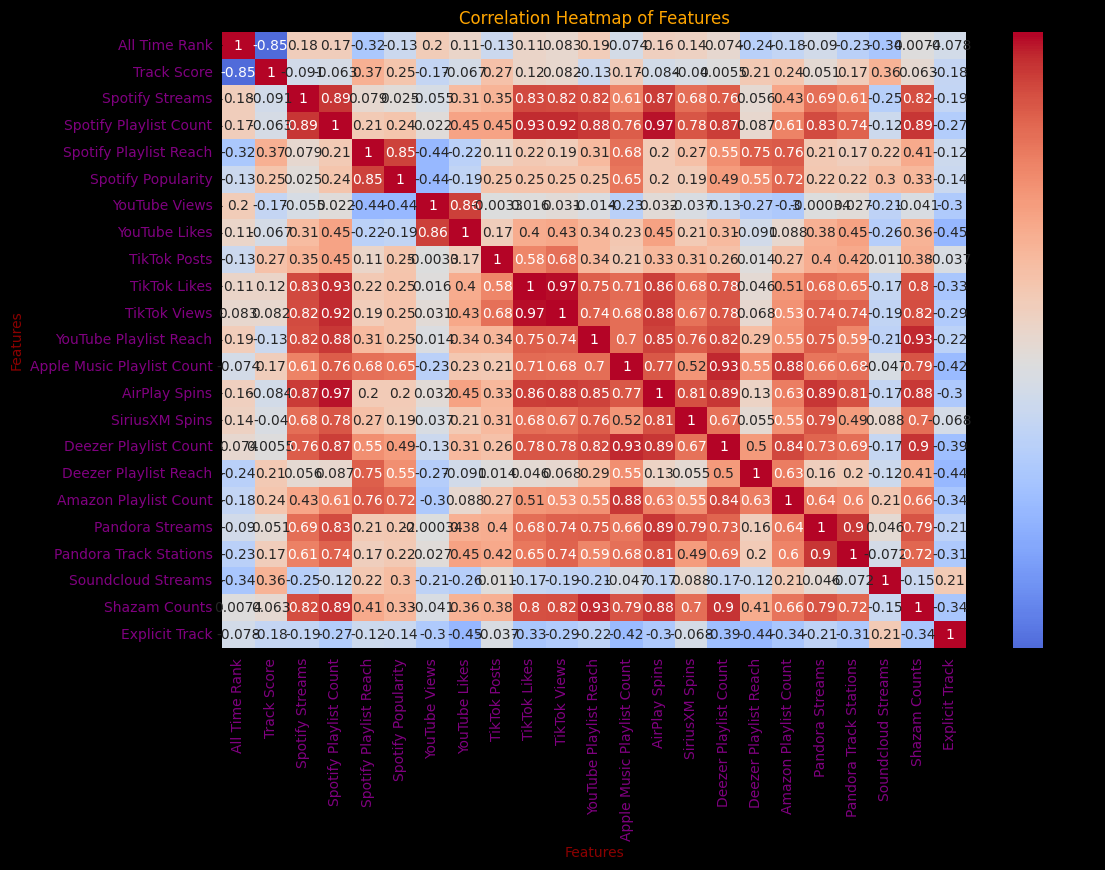

In [28]:
numeric_df = df[columns_to_clean].head(20)
corr_matrix = numeric_df.corr()

mp.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
mp.gca().set_facecolor('lightgrey')
mp.gca().spines['top'].set_color('blue')
mp.gca().spines['right'].set_color('blue')
mp.gca().spines['bottom'].set_color('green')
mp.gca().spines['left'].set_color('green')
mp.xlabel('Features', color='darkred')
mp.ylabel('Features', color='darkred')
mp.xticks(color='purple')
mp.yticks(color='purple')
mp.title('Correlation Heatmap of Features', color='orange')
mp.gcf().set_facecolor('Black')
mp.show()